In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math
import plotly.express as px
import pandas as pd
import numpy as np

## 1. Load the Karate Graph from NetworkX

In [2]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:", 
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(graph.degree()))

In [3]:
# built-in graph from networkx
karate_graph = nx.karate_club_graph()
get_graph_info(karate_graph)

Number of nodes: 34
Number of edges: 78
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Available edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Connected components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

In [4]:
# club color reference
nation_color_dict = {
    'Mr. Hi': '#aff8df',
    'Officer': '#ffcbc1'
}

# function to assign color for node visualization
def create_node_colors_from_graph(graph, club_color_dict):
    node_colors = []
    for node, club in list(graph.nodes(data="club")):
        if club in club_color_dict:
            node_colors.append(club_color_dict[club])
    return node_colors

# get node colors for plotting
node_colors = create_node_colors_from_graph(karate_graph, nation_color_dict)

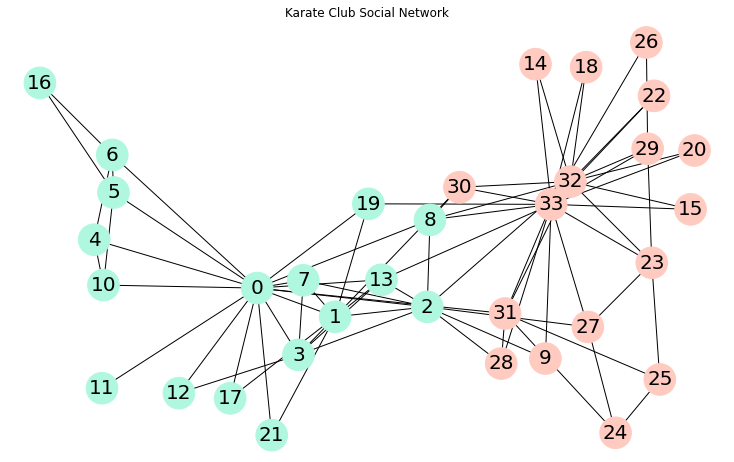

In [5]:
# create visualization
pos = nx.spring_layout(karate_graph, 
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6)) 
nx.draw(karate_graph,
        pos = pos,
        node_color=node_colors,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='black')
plt.title("Karate Club Social Network")
plt.show()

### Mint color nodes are from the "Mr. Hi" Karate club and the Salmon color nodes are from the "Officer" Karate club. 

## Description Statistics:

## 2. Link Prediction Measures
Given a network, predict which edges will be formed in the future

### 2.1 Number of Common Neighbors
1. Definition: 
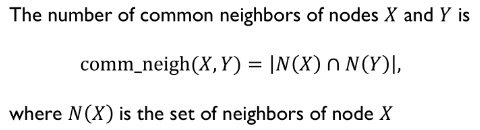

In [36]:
# get the common neighbor dataframe
def get_common_neighbors(graph):
    potential_egdes = nx.non_edges(graph)
    common_neighbors = []
    for source, target in potential_egdes:
        common_neighbors.append([source, target, 
            len(list(nx.common_neighbors(graph, source, target)))])
    common_neighbors = sorted(common_neighbors, key=lambda x: x[-1], reverse=True)
    return pd.DataFrame(common_neighbors, 
                        columns=["source", "target", "common_neighbors"])

In [41]:
# find the common neighbor measure for possible connections/edges
common_neighbors_df = get_common_neighbors(karate_graph)
common_neighbors_df["common_neighbors"].value_counts(normalize=True)

0    0.451346
1    0.327122
2    0.188406
3    0.026915
4    0.004141
6    0.002070
Name: common_neighbors, dtype: float64

In [42]:
common_neighbors_df["common_neighbors"].value_counts()

0    218
1    158
2     91
3     13
4      2
6      1
Name: common_neighbors, dtype: int64

### 45% of the possible edges have no common neighbors. The rest of the possible edges have at least 1 common neighbors. We can use these common neighbor values as features for link prediction.

In [43]:
common_neighbors_df.head()

,source,target,common_neighbors
0,2,33,6
1,0,33,4
2,7,13,4
3,0,32,3
4,1,8,3


In [44]:
list(nx.common_neighbors(karate_graph, 2, 33))

[8, 9, 13, 27, 28, 32]

### Although node 2 and node 33 are not connected, but they have the highest number (6) of common neighbors . Based on this measure, they are likely to be connected as friend in the Karate club social network.

In [49]:
# function to return a node's neighbor nodes as a list
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]

In [75]:
# function to return the subgraph containing 2 nodes' common neighbors
def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(karate_graph, source, target))
    return graph.subgraph(nodes)

In [64]:
# function create node color list for likely connected two nodes with their
# common neighbors
def create_source_target_colors(graph, source, target):
    nodes = list(graph.nodes())
    potential_connected_node_colors = ["#EFD1BB"] * len(nodes)
    for index in range(len(nodes)):
        if nodes[index] in [source, target]:
            potential_connected_node_colors[index] = "#F47315"
        elif nodes[idnex] in 
    return potential_connected_node_colors

In [76]:
def visualize_likely_connected_nodes(graph, source, target):
    # get subgraph
    subgraph = get_common_neighbor_subgraph(karate_graph, source, target)

    # create visualization
    node_colors = create_source_target_colors(subgraph, source, target)
    title = f"Karate Club Social Network: Common Neighbors of Node {source} and {target}"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

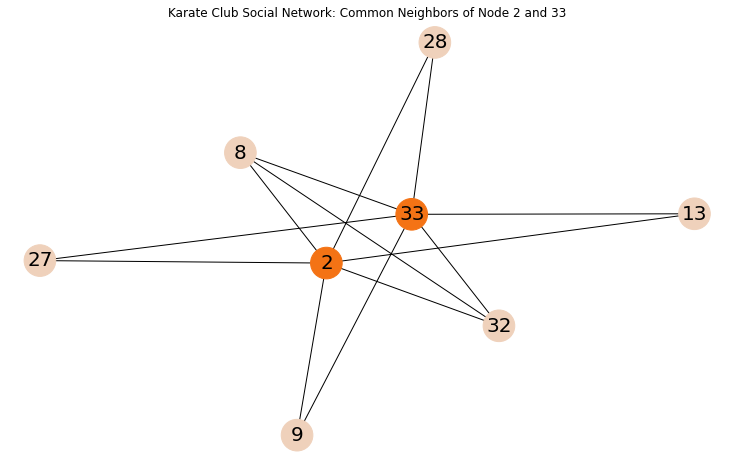

In [77]:
visualize_likely_connected_nodes(karate_graph, 2, 33)

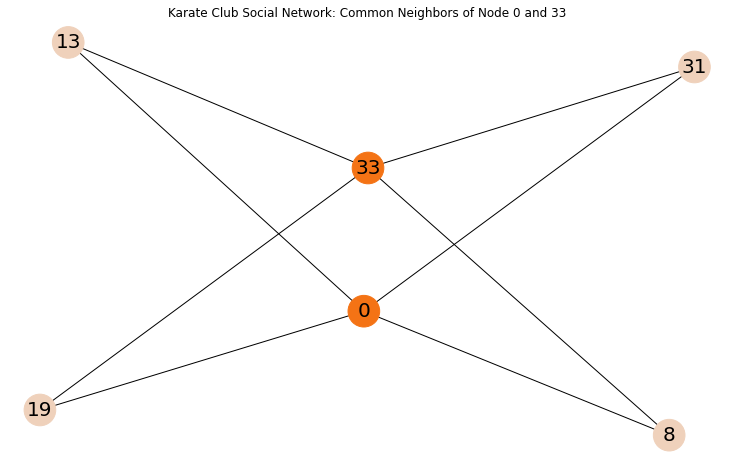

In [78]:
visualize_likely_connected_nodes(karate_graph, 0, 33)

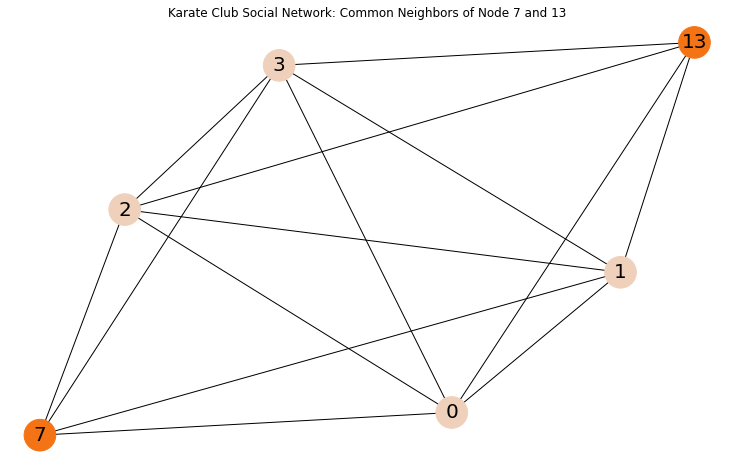

In [79]:
visualize_likely_connected_nodes(karate_graph, 7, 13)

### 2.2 Jaccard Coefficient

1. Definition:

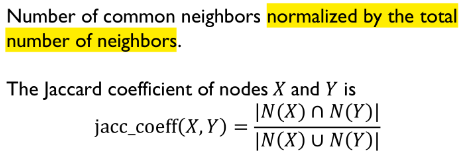

### Overall, the probability of adjacent nodes being connected is 57.06%.

### 2.3: 
1. Definition: Ratio of number of triangles and number of “open triads” in a network
2. Interpretation: Overall, what’s the probability of triangles formed over all the possible triangles in the network

In [153]:
nx.transitivity(karate_graph)

0.2556818181818182

### Overall, the probability of triangles formed over all the possible triangles in the network is 25.57%

## 3. Distance Measures

Measuring the length of the shortest path between a node A and a node B.

### 3.1 Average Distance (Average Shortest Path Length)
1. Definition: the average shortest path of all the connected node pairs
2. Interpretation: On average, how far away the nodes are from each other.

In [158]:
math.ceil(nx.average_shortest_path_length(karate_graph))

3

### On average,  the nodes are 3 steps from each other.

### 3.2 Eccentricity
1. Definition: For a node n, eccentricity is the largest distance between n and all other nodes
2. Interpretation: For each node, what’s the most far away distance to connect a node

In [161]:
# get the local cluster coefficient dataframe
def get_eccentricity_df(graph):
    eccentricity_df = pd.DataFrame(sorted(nx.eccentricity(graph).items(), 
                                 key=lambda item: -item[1]), 
                      columns=["node", "eccentricity"])
    return eccentricity_df

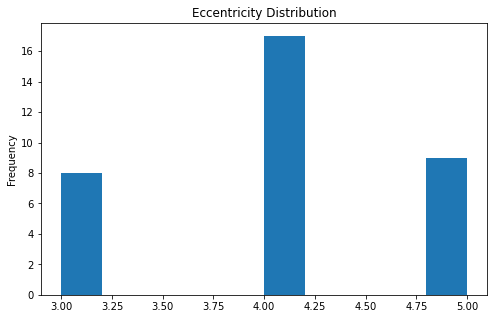

In [175]:
# get sorted accentricty df
eccentricity_df = get_eccentricity_df(karate_graph)
eccentricity_df["eccentricity"].plot.hist(figsize=(8,5), title="Eccentricity Distribution");

### For the majority of the nodes, the most far away distance to connect any node is 4.  
### The min eccentricity is 3 and the max eccentricity is 5.


In [186]:
# Do the two club have similar eccentricty among the members?
eccentricity_df["club"] = [node_data[node] for node in eccentricity_df["node"]]
eccentricity_df.drop(["node"], axis=1).groupby("club").describe()

eccentricity                                             
               count      mean       std  min  25%  50%  75%  max
club                                                             
Mr. Hi          17.0  3.647059  0.606339  3.0  3.0  4.0  4.0  5.0
Officer         17.0  4.411765  0.618347  3.0  4.0  4.0  5.0  5.0

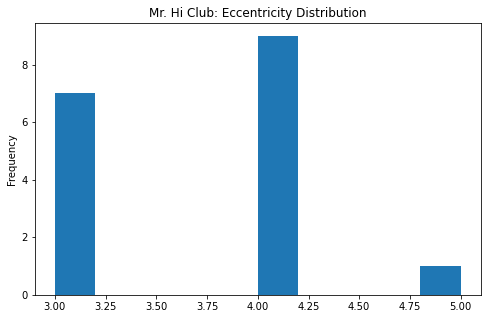

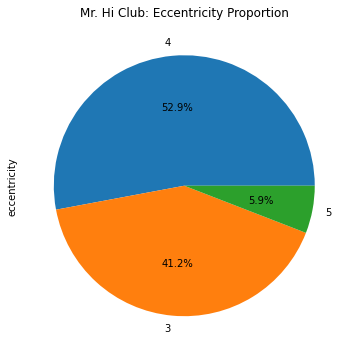

In [209]:
eccentricity_df.query("club == 'Mr. Hi'")["eccentricity"].plot.hist(figsize=(8,5), 
                                                                     title="Mr. Hi Club: Eccentricity Distribution");
plt.show();
eccentricity_df.query("club == 'Mr. Hi'")["eccentricity"].\
value_counts(normalize=True).plot(kind="pie", 
                                  autopct='%1.1f%%',
                                  figsize=(10,6), 
                                  title="Mr. Hi Club: Eccentricity Proportion");

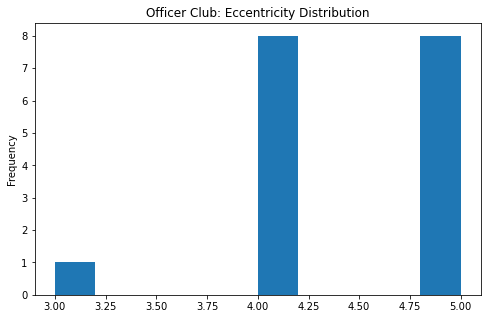

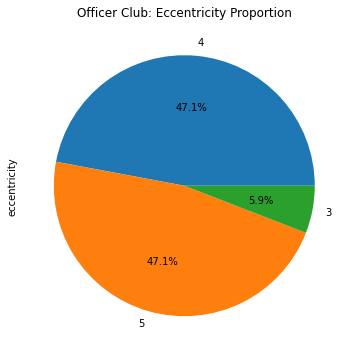

In [207]:
eccentricity_df.query("club == 'Officer'")["eccentricity"].plot.hist(figsize=(8,5), 
                                                                     title="Officer Club: Eccentricity Distribution");
plt.show();
eccentricity_df.query("club == 'Officer'")["eccentricity"].\
value_counts(normalize=True).plot(kind="pie", 
                                  autopct='%1.1f%%',
                                  figsize=(10,6), 
                                  title="Officer Club: Eccentricity Proportion");

### The eccentricty distribution for Mr. Hi club is mostly centered around 4 whereas the eccentricity distribution for Officer club is mostly skewed to the left. As you can observe, the officer club has higher proportion of nodes with eccentricty of 4 and 5 comparing to the Mr. Hi club.

### 3.3 Radius (**min eccentricty**)
1. Definition: For the entire network’s eccentricity values, radius is the minimum eccentricity; (min of the all the nodes’ largest distance between itself and all other nodes). A disconnected graph therefore has infinite radius.
2. Interpretation: To reach all the nodes, what’s the shortest distance needed for existing nodes in the graph. It’s like the radius of a circle but here it’s the graph.


In [176]:
nx.radius(karate_graph)

3

### In the network, the min shortest path distance to connect any 2 nodes is 3.

### 3.4 Diameter (**max eccentricty**)
1. Definition: maximum shortest distance between any pair of nodes of the entire network
2. Interpretation: In the network, what’s maximum shortest path distance to connect any 2 nodes


In [159]:
nx.diameter(karate_graph)

5

### In the network, the maximum shortest path distance to connect any 2 nodes is 5.

### 3.5 Center
1. Definition: set of nodes that have eccentricity = radius
2. Interpretation: For a graph, what nodes are closest to other nodes and can reach all other nodes with shortest distances.

In [177]:
nx.center(karate_graph)

[0, 1, 2, 3, 8, 13, 19, 31]

In [238]:
# for all non-center node, use color of "#EFD1BB"
# for center nodes, use color of "#F47315"
center_study_node_colors = ["#EFD1BB"] * len(karate_graph.nodes())
for node_id in nx.center(karate_graph):
    center_study_node_colors[node_id] = "#F47315"

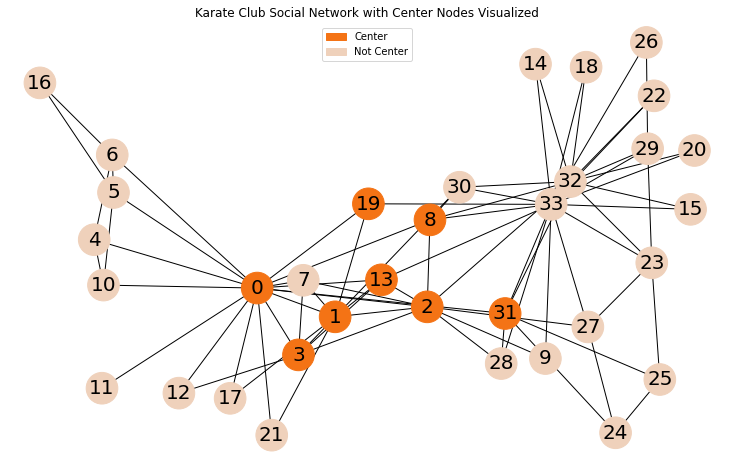

In [239]:
# visualize the network with spring layout
pos = nx.spring_layout(karate_graph, 
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6)) 

nx.draw(karate_graph,
        pos = pos,
        node_color=center_study_node_colors,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='black')

# create legend and show the plot
legend_tiles = [mpatches.Patch(color="#F47315", label="Center"),
                mpatches.Patch(color="#EFD1BB", label="Not Center")]
plt.legend(handles=legend_tiles, loc="upper center")
plt.title("Karate Club Social Network with Center Nodes Visualized")
plt.show()

### The orange nodes are the center nodes with the same smallest network eccentricity of 3 (largest shortest path distance to all other nodes in 3 steps).

### 3.6 Periphery
1. Definition: set of nodes that have eccentricity = diameter
2. Interpretation: For a graph, what nodes are farest away from other nodes and can reach other nodes with the longest shortest distance.

In [210]:
nx.periphery(karate_graph)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [240]:
# for all non-periphery node, use color of "#EFD1BB"
# for periphery nodes, use color of "#4EA2E2"
periphery_study_node_colors = ["#EFD1BB"] * len(karate_graph.nodes())
for node_id in nx.periphery(karate_graph):
    periphery_study_node_colors[node_id] = "#4EA2E2"

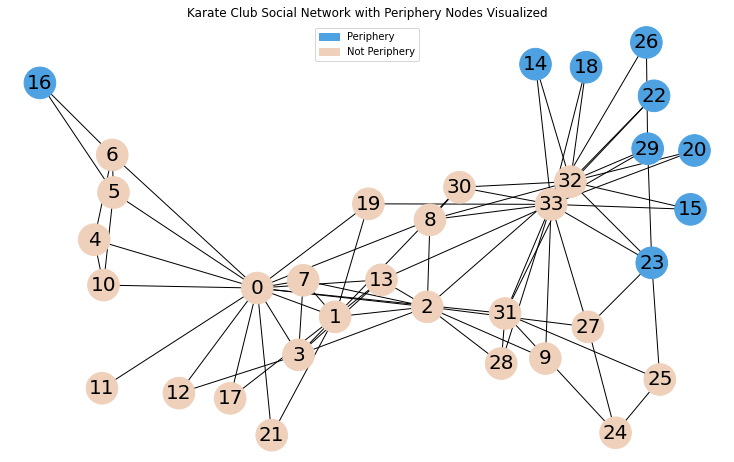

In [243]:
# visualize the network with spring layout
pos = nx.spring_layout(karate_graph, 
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6)) 

nx.draw(karate_graph,
        pos = pos,
        node_color=periphery_study_node_colors,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='black')

# create legend and show the plot
legend_tiles = [mpatches.Patch(color="#4EA2E2", label="Periphery"),
                mpatches.Patch(color="#EFD1BB", label="Not Periphery")]
plt.legend(handles=legend_tiles, loc="upper center")
plt.title("Karate Club Social Network with Periphery Nodes Visualized")
plt.show()

### The blue nodes ar ethe periphery nodes with the largest network eccentricity value of 5. They are further away from other nodes and shortest path for them to reach any other nodes is 5 steps.